When we talk about the "time efficiency" of an algorithm, we don't want to restrict it to a very specific programming implementation being applied to a very specific input in a very specific hardware and software environment.

We want to focus only on the actual algorithm itself, i.e., the sequence of steps, regardless of how it is implemented (even if we implement it by hand).

To discuss the efficiency of an algorithm, we will be introducing the RAM Model. In the RAM Model, we consider time efficiency by simply counting the number of simple steps performed in the algorithm.

*   Simple operations like +-*/ are treated as one step each
*   In a loop, the same steps may be performed multiple times, and they should all be counted
*   Memory Access is also considered one step



In [ ]:
def printfirstlast (lst):   # 2 steps
  print (lst[0])
  print (lst[-1])

lst = [12, 87, 36, 29, 18]

printfirstlast (lst)

# We can consider printfirstlast as taking two steps

def wrapper (lst):      # 4 steps
  printfirstlast (lst)
  print ("Done")

12
18


Some of the challenges to deal with when using the RAM Model:

*   The number of steps often depends on the size of the input. **Solution:** We will express the runtime as a function of the input size. Specifically, we consider the input size as some variable like $n$, and we count the number of steps in terms of $n$. For example, if the number of steps is double the input size, we would express it as $2n$.
*   The number of steps may also depend on the actual values in the input (even if the size is fixed), i.e., two input instances of the same size may still require a different number of steps based on the actual values. **Solution:** We specify what kind of input is being considered, typically from one of three cases: best-case (minimum possible runtime), worst-case (maximum possible runtime), and average-case (average runtime).

Best-Case Runtime is the smallest possible runtime that can be achieved from one single input of size $n$ out of all possible inputs of size $n$.

Worst-Case Runtime is the largest possible runtime that can be achieved from one single input of size $n$ out of all possible inputs of size $n$.

Average-Case Runtime is the average of ALL possible inputs of size $n$.

*   There could be multiple valid interpretations on how many steps are performed in some component of the algorithm.
*   It can be tricky to determine the precise number of steps in some component of the algorithm

In [ ]:
def printall (lst):
  for elem in lst:
    print (elem)

lst = [12, 87, 36, 29, 18]

printall (lst)

# How many steps does printall perform?
# We could consider this as n steps
# One could also argue that this takes 2n steps
# because the for loop performs some hidden assignments, elem = 12, elem = 87, etc

# Best-Case = Worst-Case = Average-Case

12
87
36
29
18


In [ ]:
def printplusfive (lst):
  for elem in lst:
    print (elem + 5)

lst = [12, 87, 36, 29, 18]

printplusfive (lst)

# How many steps? 2n? 3n?

# Best-Case = Worst-Case = Average-Case

17
92
41
34
23


In [ ]:
def printlast (lst):
  print (lst[-1])

lst = [12, 87, 36, 29, 18]

printlast (lst)

# How many steps? 1? 2?

# In an array, you can access any specific element by index in only one step

# Best-Case = Worst-Case = Average-Case

18


A constant function, e.g., $f(n) = 5$ is still a valid function, even though the function does not mention the argument $n$ at all. This means the function always produces the same value regardless of the value of $n$, i.e., the number of steps is always the same, regardless of the input size.

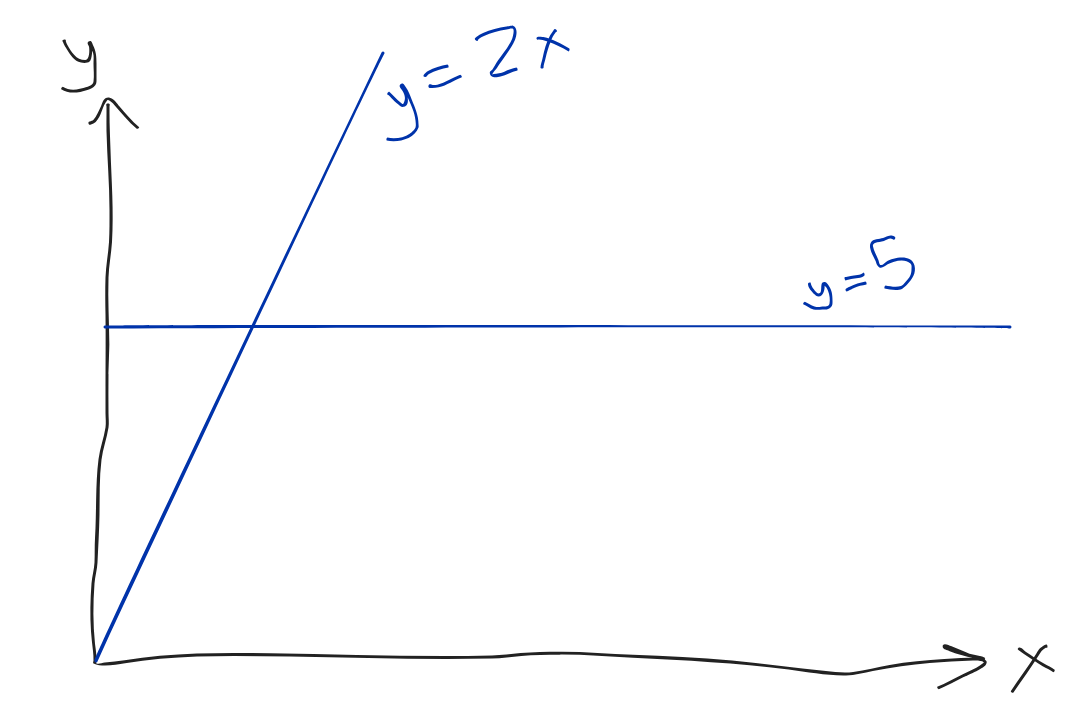

In [ ]:
def combine (lst):
  for elem1 in lst:           # this loop runs n times
    for elem2 in lst:         # for each iteration of the first loop, this loop runs n times
      print (elem1 + elem2)   # this runs a total of n*n = n^2 times

lst = [28, 71, 19]

combine (lst)

# How many steps? n^2? 2n^2? 3n^2?

# Best-Case = Worst-Case = Average-Case

56
99
47
99
142
90
47
90
38


In [ ]:
# Problem: Given an input array where each integer from 0 to n-1 (where n is
# array length) appears exactly once, find the index that contains 0

def findzero (lst):
  for i in range (len (lst)):   # iterate over every valid index of lst
    if lst[i] == 0:
      return i

lst1 = [0, 1, 2, 3]
lst2 = [2, 1, 3, 0]
lst3 = [7, 3, 0, 1, 4, 2, 5, 6]
lst4 = [5, 4, 3, 2, 1, 0]

print (findzero (lst1))   # 0
print (findzero (lst2))   # 3
print (findzero (lst3))   # 2
print (findzero (lst4))   # 5

# How many steps does findzero perform (in terms of n)?
# This depends on the actual values of the array

# Best-Case Runtime: 2 or 3 or 4 steps, where the for loop runs only once
# This arises when 0 is the first element of the array
# Worst-Case Runtime: n+1 or 2n+1 or 2n+2 steps, where the loop runs n times
# This arises when 0 is the last element of the array

0
3
2
5


In [ ]:
# range (10) is a range object with values from 0 to 9
print (range (10))
print (list (range (10)))

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
def getmax2 (lst):
  mx = lst[0]           # always 1 step
  for elem in lst:
    if elem > mx:       # always runs n times (n steps)
      mx = elem         # depends on input
  return mx             # always 1 step

# Best-Case Runtime: n+2 steps? 2n+2 steps? Line 5 never runs at all because the
# first element is the largest element
# Worst-Case Runtime: 2n+1 steps? 3n+1 steps? Line 5 runs maximum n-1 times.
# This arises if each element is larger than all previous elements
# i.e., the array is sorted.
# Note: Line 5 cannot run n times because mx is initially lst[0], so for the
# first iteration of the loop, elem is equal to mx and the condition is False

By definition, average-case analysis is supposed to consider every possible input instance of size $n$, and take the average of all of their runtimes.

This is obviously not realistic to calculate by hand, especially since the function needs to be correct for all values of $n$ (there are infinitely many such values).

In practice, how do we determine the average-case runtime?

One easy scenario is when the best-case is equal to the worst-case, then this must also be the average-case.

But if best-case does not match with worst-case, then computing the average-case becomes harder. Typically, we would need to make some key mathematical observations about the runtime for the various input instances and their distribution.

We want to find the average-case runtime for findzero (as a function of $n$).

Consider the following observations:

*  The number of times that the loop runs is equal to the position of 0. If 0 is the first element, then the loop runs once. If 0 is the second element, then the loop runs twice. And so on. If 0 is the last element, then the loop runs $n$ times.
*  Although there are many input instances, the number of instances where 0 is in the first position is equal to the number of instances where 0 is in the second position and also equal to the number of instances where 0 is in the third position and so on.

So, instead of worrying about all possible input instances, we can instead focus on all possible positions of 0, and take the average.

In other words, the average-case number of times the loop runs is equal to the average of $1, 2, 3, \ldots, n$. Therefore, the average is $\frac{1 + 2 + 3 + \cdots + n}{n} = \frac{n(n + 1)/2}{n} = \frac{n + 1}{2}$

The total number of steps, therefore, is roughly $2\left(\frac{n + 1}{2}\right) + 1 = n + 2$ or $\frac{n + 1}{2} + 1$ or $n + 3$.

Average-Case Analysis is typically much harder than Best-Case or Worst-Case Analysis. For this course, any questions about average-case analysis would have some kind of reasonable approach that determines the average-case runtime (like findzero). Even then, this is typically one of the hardest questions in this course.

In broader algorithmic analysis beyond the scope of this course, average-case analysis is often very complicated.